## 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/bike-sharing-demand/data)에서 다운받으실 수 있습니다)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

In [31]:
import pandas as pd
import numpy as np

In [32]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [33]:
train.iloc[:, 0:13].head(30)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [34]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Parse datetime

먼저 **날짜(datetime)** 컬럼을 전처리 하겠습니다.

날짜(datetime) 컬럼을 사용하기 위해서는 머신러닝 알고리즘이 이해할 수 있는 방식으로 전처리를 해주도록 하겠습니다.

날짜(datetime) 컬럼을 전처리하는 가장 쉬운 방법은 연, 월, 일, 시, 분, 초를 따로 나누는 것입니다. 

**날짜(datetime) 컬럼을 여섯개의 다른 컬럼으로 나누어주는 것이 날짜 컬럼을 전처리하는 핵심입니다**.

In [35]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)

train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [36]:
# datetime-dayofweek를 사람이 이해하기 쉬운 표현으로 변경합니다. (Monday ~ Sunday)
# 이를 datetime-dayofweek(humanized)라는 새로운 컬럼에 추가합니다.
train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-dayofweek, 그리고 datetime-dayofweek(humanized) 컬럼만을 출력합니다.
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(10886, 20)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,5,Saturday
1,2011-01-01 01:00:00,5,Saturday
2,2011-01-01 02:00:00,5,Saturday
3,2011-01-01 03:00:00,5,Saturday
4,2011-01-01 04:00:00,5,Saturday


In [37]:
# test 데이터와 train 데이터와 동일하게 연, 월, 일, 시, 분, 초 컬럼을 생성합니다.
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

# dayofweek 컬럼도 train 데이터와 동일하게 생성합니다.
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [38]:
# datetime-dayofweek를 사람이 이해하기 쉬운 표현으로 변경합니다. (Monday ~ Sunday)
# 이를 datetime-dayofweek(humanized)라는 새로운 컬럼에 추가합니다.
test.loc[test["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
test.loc[test["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
test.loc[test["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
test.loc[test["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
test.loc[test["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
test.loc[test["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
test.loc[test["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 datetime-dayofweek, 그리고 datetime-dayofweek(humanized) 컬럼만을 출력합니다.
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-20 00:00:00,3,Thursday
1,2011-01-20 01:00:00,3,Thursday
2,2011-01-20 02:00:00,3,Thursday
3,2011-01-20 03:00:00,3,Thursday
4,2011-01-20 04:00:00,3,Thursday


## Plot

전처리(Preprocesing)를 끝냈으면 그 다음에는 데이터를 분석해보겠습니다.

In [39]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

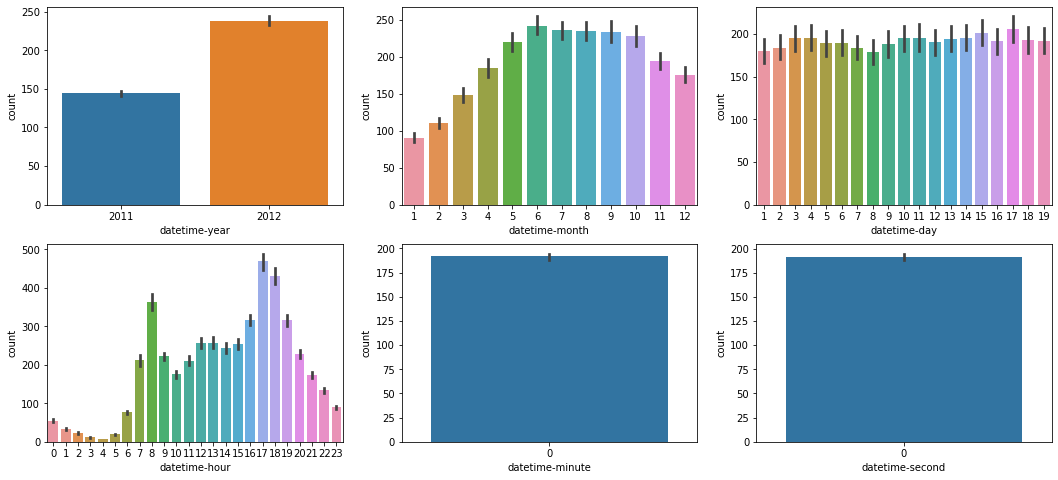

In [40]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

위 그림에서 알 수 있는 내용은 다음과 같습니다.

**datetime-year**
  * 2011년도의 자전거 대여량보다 2012년도의 자전거 대여량이 더 높습니다. 이는 본 데이터를 분석하길 원하는 사업의 이용률이 크게 성장하고 있다는 뜻입니다.

**datetime-month**
  * 주로 여름(6~8월)에 자전거를 많이 빌리며, 겨울(12~2월)에는 자전거를 많이 빌리지 않습니다.
  * 같은 겨울이라도 12월의 자전거 대여량이 1월의 자전거 대여량보다 두 배 가까이 높아 보입니다. 이것은 무엇 때문인지에 대해 더 알아보도록 하겠습니다. 
  
**datetime-day**
  * x축을 자세히 보면 1일부터 19일까지밖에 없습니다. 이 원인으로는 데이터를 train과 test로 나누기 위해 month 열을 나눈 것으로 보입니다.
  * 이런 경우 월 데이터를 feature로 집어넣으면 좋지 않은 결과가 나올 수 있습니다. 그러므로 날짜에 대한 자료는 분석에 넣지 않는 것으로 하겠습니다.

**datetime-hour**
  * 새벽 시간에는 사람들이 자전거를 빌리지 않으며, 오후 시간에 상대적으로 자전거를 많이 빌립니다.
  * 특이하게도 두 부분에서 사람들이 자전거를 특별히 많이 빌리는 현상이 있습니다. 바로 출근 시간(7~9시)과 퇴근 시간(16시~19시) 입니다.
  * 출퇴근시간이 아닌 다른 시간대에 자전거를 빌리는 경우도 존재합니다만 이에 대해서는 조금 더 살펴보도록 하겠습니다. 

**datetime-minute** & **datetime-second**
  * 이 두 컬럼은 x축이 모두 0으로 되어있습니다. 그러므로 분석에 사용하지 않는 것으로 하겠습니다. 
  
  
그러므로 이 시각화에서 알 수 있는 결론은, **년도, 달, 시간** 정도를 feature로 사용하는 것으로 하겠습니다. 
그 다음으로 이 안에서 나올 수 있는 파생 변수는 무엇이 있는지 각 변수들을 그래프로 나타내 보면서 알아보도록 하겠습니다. 

### datetime-year & datetime-month

다음에는 연-월을 붙여서 시각화해보겠습니다.

이전에는 연/월을 따로 시각화해서 출력하였지만, 이번에는 연-월을 붙여서 2011년 1월부터 2012년 12월까지 총 24개의 경우의 수를 x축으로 놓고 시각화해보고 싶습니다. 먼저 이를 시각화하기에 필요한 **datetime-year_month**라는 새로운 컬럼을 만들어 보겠습니다.

In [41]:
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

# datetime-year(str)와 datetime-month(str) 문자열 두 개를 붙여서 datetime-year_month라는 새로운 컬럼을 추가합니다.
# 이 컬럼에는 2011-1부터 2012-12까지의 총 24의 경우의 수가 들어갑니다.
train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head() train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-year_month 두 개의 컬럼만 출력합니다.
train[["datetime", "datetime-year_month"]].head()

(10886, 23)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [79]:
test["datetime-year(str)"] = test["datetime-year"].astype('str')
test["datetime-month(str)"] = test["datetime-month"].astype('str')

# datetime-year(str)와 datetime-month(str) 문자열 두 개를 붙여서 datetime-year_month라는 새로운 컬럼을 추가합니다.
# 이 컬럼에는 2011-1부터 2012-12까지의 총 24의 경우의 수가 들어갑니다.
test["datetime-year_month"] = test["datetime-year(str)"] + "-" + test["datetime-month(str)"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head() train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-year_month 두 개의 컬럼만 출력합니다.
test[["datetime", "datetime-year_month"]].head()

(6493, 20)


,datetime,datetime-year_month
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1


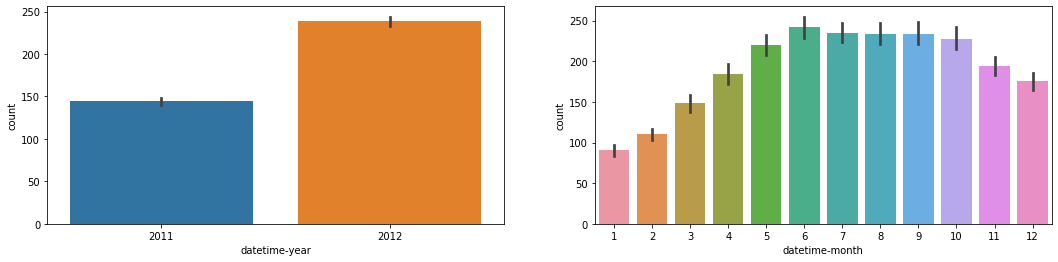

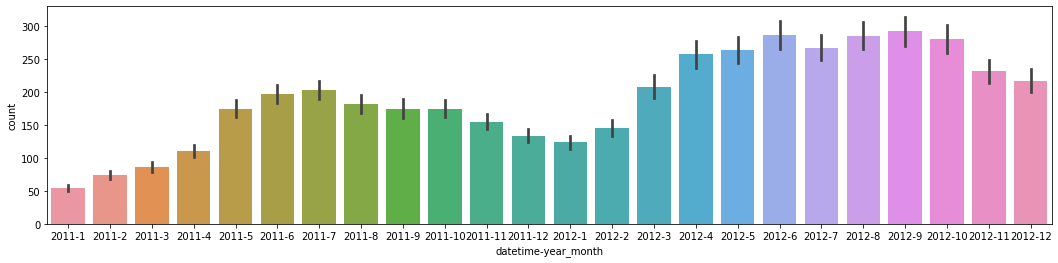

In [42]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

# 다시 한 번 matplotlib의 subplots를 사용합니다.
# 이번에는 1x1로 1개의 시각화만을 출력합니다.
figure, ax3 = plt.subplots(nrows=1, ncols=1)

# 이 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# 이번에는 seaborn의 barplot으로 연-월을 붙여서 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

위 그림에서 알 수 있는 내용은 다음과 같습니다.

  * 자전거 대여량은 꾸준히 상승하고 있는 추세입니다.
  * 우상단 시각화를 보자면, 12월의 자전거 대여량이 1월의 자전거 대여량보다 두 배 가까이 높습니다.
  * 하지만 아래의 시각화를 보면, 2011년 12월의 자전거 대여량과 2012년 1월의 자전거 대여량이 큰 차이가 없다는 사실을 발견할 수 있습니다.
  * 반면에 2011년 1월의 자전거 대여량과 2012년 12월의 자전거 대여량은 큰 차이가 나는 것을 알 수 있습니다.
  
즉, 12월이 1월에 비해 자전거 대여량이 두 배 가까이 높은 이유는, 1의 자전거 대여량이 꾸준히 상승하고 있는 추세이며, 2) 이 과정에서 시기상으로 12월이 1월부터 늦게 발생했기 때문입니다. 즉 **자전거를 대여하는 고객 입장에서 12월이라고 자전거를 더 많이 빌려야 할 이유는 없습니다.**

이 점 역시 머신러닝 알고리즘이 과적합(overfitting)될 소지가 다분합니다. 이를 해결할 수 있는 다양한 방법이 있는데,

  * **datetime-year_month**를 통채로 One Hot Encoding해서 feature로 사용한다.
  * 자전거 대여량이 꾸준히 성장하는 추세에 맞춰서 count를 보정한다.
  
그렇다면 위의 두 방법 중 더미 함수를 이용해 one hot encoding을 진행한 후 분석에 들어가도록 하겠습니다. 


### dummy 함수를 이용한 one hot encoding

In [63]:
train1 = pd.get_dummies(train['datetime-year_month'])

In [64]:
train2 = train.join(train1)

In [65]:
train2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,2012-11,2012-12,2012-2,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,0,0,0,0,0,0,0,0,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,0,0,0,0,0,0,0,0,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,0,0,0,0,0,0,0,0,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,0,0,0,0,0,0,0,0,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,0,0,0,0,0,0,0,0,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,0,0,0,0,0,0,0,0,0,0


In [81]:
test1 = pd.get_dummies(test['datetime-year_month'])
test2 = test.join(test1)
test2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,2012-11,2012-12,2012-2,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0


### datetime-hour

다음에는 **datetime-hour** 컬럼을 분석해보겠습니다.

이번에는 **datetime-hour** 컬럼 외에도 두 개의 컬럼을 추가로 분석하겠습니다. 바로 근무일(workingday)와 요일(datetime-dayofweek)입니다.

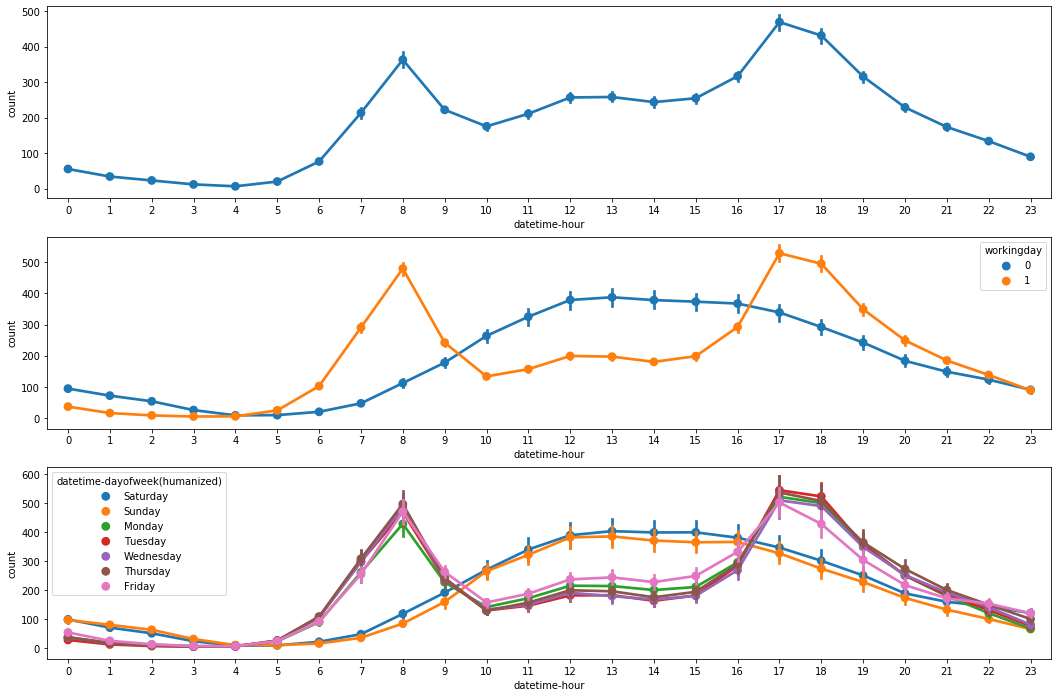

In [50]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 3x1로 총 3개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화의 전체 사이즈는 18x12로 설정합니다.
figure.set_size_inches(18, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 근무일(workingday)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 요일(datetime-dayofweek)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(humanized)", ax=ax3)

  * 분석해 보자면 
  - 일단 일하는 평일과 주말의 데이터가 다릅니다. 이것은 아마도 출근하는 방법으로 자전거를 이용하는 사람들이 많기 때문인 것 같습니다. 
  - 평일과 주말은 또한 낮시간대에 이용률이 다른 것으로 나타났습니다. 
  - 그리고 금요일(핑크)은 평일 낮시간에 이용률이 조금 늘어나고 저녁시간(퇴근근처)에 이용률이 조금 줄어드는 것으로 나타났습니다. 
  - 그러므로 datetime-dayofweek은 파생변수로서 가치가 있다고 판단하고 분석에 이용하도록 하겠습니다. 

In [51]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,1,0,0,0,5,Saturday,2011,1,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,1,1,0,0,5,Saturday,2011,1,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,1,2,0,0,5,Saturday,2011,1,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,1,3,0,0,5,Saturday,2011,1,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,1,4,0,0,5,Saturday,2011,1,2011-1


## count 

- 다음에는 타겟이 되는 count 컬럼에 대해 분석해 보도록 하겠습니다.

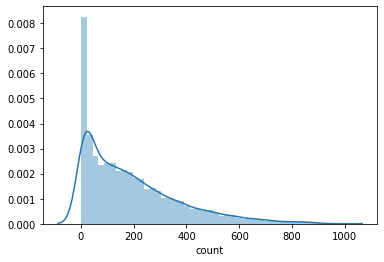

In [52]:
sns.distplot(train2["count"])

* 압도적으로 많은 빈도수는 200번 이전으로 하루에 이용량이 200이 넘는 날은 그다지 많지 않은 것으로 나타났습니다. 
* 또한 이상치 라고 여겨지는 1000번에 가까운 이용 횟수도 있습니다. 
* 일단 파이썬 분석에서는 이렇게 차이가 많은 값들을 넣어 주었을때 분석이 명확치 않을 수 있기 때문에 로그함수를 이용해 값을 평준화 해 주도록 하겠습니다. 

In [66]:
# 자전거 대여량(count)에 +1을 한 후 log를 적용합니다.
train2["log_count"] = np.log(train2["count"] + 1)

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train2.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# count와 log_count 컬럼만 출력합니다.
train2[["count", "log_count"]].head()

(10886, 48)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


## 알고리즘을 이용한 모델 만들기

- 이제 사용할 컬럼들에 대한 정리가 끝났으니 분석에 들어가보도록 하겠습니다. 
- 먼저 제거 해야할 컬럼들과 남겨둬야할 컬럼들을 살펴보고 제거해 보도록 하겠습니다.

In [67]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 48 columns):
datetime                         10886 non-null datetime64[ns]
season                           10886 non-null int64
holiday                          10886 non-null int64
workingday                       10886 non-null int64
weather                          10886 non-null int64
temp                             10886 non-null float64
atemp                            10886 non-null float64
humidity                         10886 non-null int64
windspeed                        10886 non-null float64
casual                           10886 non-null int64
registered                       10886 non-null int64
count                            10886 non-null int64
datetime-year                    10886 non-null int64
datetime-month                   10886 non-null int64
datetime-day                     10886 non-null int64
datetime-hour                    10886 non-null int64
datetime-min

* 먼저 많은 컬럼들을 추출했던 datetime을 제거 하도록 하겠습니다. 
* 또한 object로 나와있는 컬럼들 또한 분석이 가능하지 않으므로 지우겠습니다.
* 일자 데이터 또한 제거하기로 했으므로 제거하도록 하겠습니다. 
* 마지막으로 따로 log를 취하여 컬럼을 만들기 전인 count도 제거하도록 

In [68]:
drop_list = ["datetime","datetime-day","datetime-dayofweek(humanized)","datetime-year(str)","datetime-month(str)","datetime-year_month","count"]

In [69]:
train2 = train2.drop(drop_list, axis=1)

In [74]:
train2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,2012-12,2012-2,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9,log_count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,...,0,0,0,0,0,0,0,0,0,2.833213
1,1,0,0,1,9.02,13.635,80,0.0,8,32,...,0,0,0,0,0,0,0,0,0,3.713572
2,1,0,0,1,9.02,13.635,80,0.0,5,27,...,0,0,0,0,0,0,0,0,0,3.496508
3,1,0,0,1,9.84,14.395,75,0.0,3,10,...,0,0,0,0,0,0,0,0,0,2.639057
4,1,0,0,1,9.84,14.395,75,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0.693147


In [83]:
test2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,2012-11,2012-12,2012-2,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0


In [84]:
drop_list_test = ["datetime","datetime-day","datetime-dayofweek(humanized)","datetime-year(str)","datetime-month(str)","datetime-year_month"]
test2 = test2.drop(drop_list_test, axis=1)

In [85]:
test2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,...,2012-11,2012-12,2012-2,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,...,0,0,0,0,0,0,0,0,0,0


### target과 feature 나누기 
 - 이제 분석대상이 될 count(log를 취한 값) 과 나머지 feature들 을 x와 y로 나누어 분석준비를 하도록 하겠습니다. 

In [156]:
X_train = train2.drop(["log_count", "casual", "registered"], axis=1)
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,...,2012-11,2012-12,2012-2,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,...,0,0,0,0,0,0,0,0,0,0


In [157]:
y_train = train2["log_count"]
y_train.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

In [106]:
test2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,...,2012-11,2012-12,2012-2,2012-3,2012-4,2012-5,2012-6,2012-7,2012-8,2012-9
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,...,0,0,0,0,0,0,0,0,0,0


In [155]:
X_test = test2

## Hyperparameter Tuning

이번에는 머신러닝 모델의 하이퍼패러미터를 튜닝해보겠습니다.

머신러닝 모델에는 다양한 옵션이 있는데, 이 옵션을 통해 모델의 성능을 끌어올릴 수 있습니다. 이 옵션들을 전문용어로 하이퍼패러미터(Hyperparameter)라고 부릅니다. 만일 적절한 하이퍼패러미터를 찾아서 모델에 적용할 수 있다면 모델의 성능을 한 층 더 끌어올릴 수 있습니다. 이를 **하이퍼패러미터 튜닝(Hyperparamter Tuning)**이라고 합니다.

In [91]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 생성합니다.
# 생성한 모델을 출력하면 다양한 하이퍼패러미터(n_estimators, max_depth, etc)들이 있는 것을 확인할 수 있습니다.
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Evaluate

머신러닝 모델을 학습시키기 전에, 측정 공식(Evaluation Metric)을 통해 학습한 모델의 성능이 얼마나 뛰어난지 정량적으로 측정해보겠습니다. 이번 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회에서 사용하는 측정 공식은 Root Mean Squared Logarithmic Error ([RMSLE](https://www.kaggle.com/c/bike-sharing-demand#evaluation)) 입니다.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

이 공식은 정답($a_i$, actual)과 예측값($p_i$, predict)의 차이가 크면 클수록 **페널티를 덜 주는** 방식으로 동작합니다. (```log(count + 1)```이 그 역할을 합니다)

다만 현재 이미 log transformation한 count(log_count)을 사용하고 있기 때문에, 이 공식을 그대로 사용할 경우 **사실상 ```log(count + 1)```를 두 번 하게 되는 셈이 됩니다.** 이를 방지하기 위해, 측정 공식에서 ```log(count + 1)```을 제거하도록 하겠습니다.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (p_i - a_i)^2 } $$

이 공식을 Root Mean Squared Error ([RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation))라고 합니다. 파이썬과 [numpy](http://www.numpy.org/), [scikit-learn](http://scikit-learn.org/stable/)으로 **RMSE** 공식을 구현해보겠습니다.

In [93]:
# numpy라는 패키지를 불러옵니다.
# 이 패키지는 선형대수(linear algebra) 패키지라고 불리는데,
# 현재는 간단하게 '수학 연산을 편하게 해주는 패키지'라고 이해하시면 됩니다.
import numpy as np

# scikit-learn 패키지의 metrics 모듈에서 make_scorer라는 함수를 가지고 옵니다.
# 이 함수는 파이썬을 구현한 측정 공식을 scikit-learn에서 사용할 수 있도록 변환해 줍니다.
from sklearn.metrics import make_scorer

# RMSE 공식을 구현한 함수를 생성합니다.
# 이 함수는 예측값(predict)과 정답(actual)을 인자로 받습니다.
def rmse(predict, actual):
    # predict와 actual을 numpy array로 변환합니다.
    # 이렇게 하면 수학 연산을 편하게 할 수 있습니다.
    predict = np.array(predict)
    actual = np.array(actual)

    # 공식에 쓰여진대로 predict와 actual을 빼서 차이를 구합니다.
    # 이 차이를 distance라는 이름의 새로운 변수에 할당합니다.
    distance = predict - actual
    
    # 공식에 쓰여진대로 distance를 제곱합니다.
    # 이 결과를 square_distance라는 이름의 새로운 변수에 할당합니다.
    square_distance = distance ** 2
    
    # 공식에 쓰여진대로 square_distance의 평균을 구합니다.
    # 이 결과를 mean_square_distance라는 이름의 새로운 변수에 할당합니다.
    mean_square_distance = square_distance.mean()
    
    # 공식에 쓰여진대로 mean_square_distance에 루트(sqrt)를 씌웁니다.
    # 이 결과를 score라는 이름의 새로운 변수에 할당합니다.
    score = np.sqrt(mean_square_distance)
    
    # score 변수를 반환합니다.
    return score

# scikit-learn의 make_scorer를 활용하여
# rmse 함수를 scikit-learn의 다른 함수에서 사용할 수 있도록 변환합니다.
# 이 결과를 rmse_score라는 이름의 새로운 변수에 할당합니다.
rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

In [94]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_score 함수를 가지고 옵니다.
# 이 함수가 Cross Validation을 담당합니다.
from sklearn.model_selection import cross_val_score

# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 3,000)
n_estimators = 300

# max_depth의 후보군을 지정합니다. 10 ~ 90 사이에서 10 단위로 지정하겠습니다.
max_depth_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# max_features의 후보군을 지정합니다. 0.1 ~ 0.9 사이에서 0.2 단위로 지정하겠습니다.
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9]

# hyperparameter 탐색 결과를 리스트로 저장합니다.
hyperparameters_list = []

# 반복문으로 모든 max_depth의 후보군을 가져옵니다.
for max_depth in max_depth_list:
    # 반복문을 하나 더 집어넣어서, 모든 max_features의 후보군을 가져옵니다.
    for max_features in max_features_list:
        # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
        # 1) n_estimators. 트리의 갯수입니다.
        # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
        # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
        # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
        # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      n_jobs=-1,
                                      random_state=37)

        # cross_val_score를 실행합니다. 실행할 때는 다음의 옵션이 들어갑니다.
        # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
        # 2) X_train. train 데이터의 feature 입니다.
        # 3) y_train. train 데이터의 label 입니다.
        # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
        # 5) scoring. 점수를 측정할 공식입니다. 앞서 구현한 RMSE를 적용합니다.
        # 마지막으로, 이 함수의 실행 결과의 평균(mean)을 구한 뒤 score라는 이름의 새로운 변수에 할당합니다.
        score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
        
        # hyperparameter 탐색 결과를 딕셔너리화 합니다.
        hyperparameters = {
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        }

        # hyperparameter 탐색 결과를 리스트에 저장합니다.
        hyperparameters_list.append(hyperparameters)

        # hyperparameter 탐색 결과를 출력합니다.
        print(f"n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)

# 변환한 hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

# hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(hyperparameters_list.shape)

# hyperparameters_list의 상위 5개를 출력합니다.
hyperparameters_list.head()

n_estimators = 300, max_depth = 10, max_features = 0.100000, Score = 0.34378
n_estimators = 300, max_depth = 10, max_features = 0.300000, Score = 0.08615
n_estimators = 300, max_depth = 10, max_features = 0.500000, Score = 0.03246
n_estimators = 300, max_depth = 10, max_features = 0.700000, Score = 0.01927
n_estimators = 300, max_depth = 10, max_features = 0.900000, Score = 0.01607
n_estimators = 300, max_depth = 20, max_features = 0.100000, Score = 0.21525
n_estimators = 300, max_depth = 20, max_features = 0.300000, Score = 0.05784
n_estimators = 300, max_depth = 20, max_features = 0.500000, Score = 0.02545
n_estimators = 300, max_depth = 20, max_features = 0.700000, Score = 0.01668
n_estimators = 300, max_depth = 20, max_features = 0.900000, Score = 0.01420
n_estimators = 300, max_depth = 30, max_features = 0.100000, Score = 0.21087
n_estimators = 300, max_depth = 30, max_features = 0.300000, Score = 0.05778
n_estimators = 300, max_depth = 30, max_features = 0.500000, Score = 0.02547

KeyboardInterrupt: 

In [107]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# 하이퍼패러미터 튜닝이 끝났으면, 이제 n_estimators를 가능한 높은 값을 주겠습니다.
best_n_estimators = 300
best_max_depth = 40
best_max_features = 0.900000
        
# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=37,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [108]:
# RandomForestRegressor를 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

## Predict

Random Forest가 성공적으로 학습이 되었다면, 남은 것은 이 Random Forest를 활용해 test 데이터에 있는 자전거 대여량을  예측하는 것입니다. 예측은 ```model.predict```로 할 수 있으며, 이 때 test 데이터의 feature인 ```X_test```가 필요합니다.

In [109]:
# fit이 끝났으면, predict라는 기능을 사용하여 log transformation한 자전거 대여량(log_count)을 예측합니다.
# log_predictions의 실행이 끝나면 test 데이터의 log transformation한 자전거 대여량(log_count)을 반환하며,
# 이를 predictions라는 이름의 변수에 할당합니다.
log_predictions = model.predict(X_test)

# log_predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(log_predictions.shape)

# log_predictions 변수를 출력합니다.
log_predictions

(6493,)


array([2.39385644, 1.76187173, 1.40163578, ..., 4.97911979, 4.67230748,
       4.12695785])

앞서 데이터를 분석할 때 설명한대로, **Random Forest에서 예측한 것은 자전거 대여량(count)이 아닌 log transformation한 자전거 대여량(log_count)입니다.** 이를 다시 자전거 대여량(count)으로 원상복구 하기 위해 exp를 사용하겠습니다.

In [110]:
# log transformation한 자전거 대여량(log_count)을 다시 exp로 원상복귀 합니다.
# (=자연로그는 exp로 없애버릴 수 있습니다)
# 이를 predictions라는 새로운 변수에 할당합니다.
predictions = np.exp(log_predictions) - 1

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수를 출력합니다.
predictions

(6493,)


array([  9.95566245,   4.82332687,   3.0618388 , ..., 144.34638952,
       105.94422978,  60.98905588])

In [112]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("data/sampleSubmission.csv")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [113]:
# 제출 포멧(submission)의 자전거 대여량(count) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 6493개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["count"] = predictions

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.955662
1,2011-01-20 01:00:00,4.823327
2,2011-01-20 02:00:00,3.061839
3,2011-01-20 03:00:00,3.116989
4,2011-01-20 04:00:00,2.504344


In [114]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("data/random-forest_류경민.csv", index=False)

- 현재 랜덤 포레스트로는 607등(0.431)정도의 정확성이 나온다.
- 다른 분석을 그냥 적용해보려고 하였으나 실패하여 개인적으로 예측율을 올려보는 것으로 대체 하겠습니다. 

In [163]:
X = X_train.values

In [164]:
y = y_train.values

In [165]:
import xgboost as xg
xgr=xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.6,subsample=0.6)
xgr.fit(X,y)

[18:07:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=6, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

In [168]:
X_test1=X_test.iloc[:,:].values
X_test1.shape

(6493, 38)

In [170]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("data/sampleSubmission.csv")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [169]:
y_output=xgr.predict(X_test1)
y_output

In [171]:
# 제출 포멧(submission)의 자전거 대여량(count) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 6493개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["count"] = y_output

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,2.612711
1,2011-01-20 01:00:00,1.709505
2,2011-01-20 02:00:00,1.522300
3,2011-01-20 03:00:00,1.410676
4,2011-01-20 04:00:00,1.319593


In [172]:
submission.to_csv("sub4.csv")